# Linear Regression

In [ ]:
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

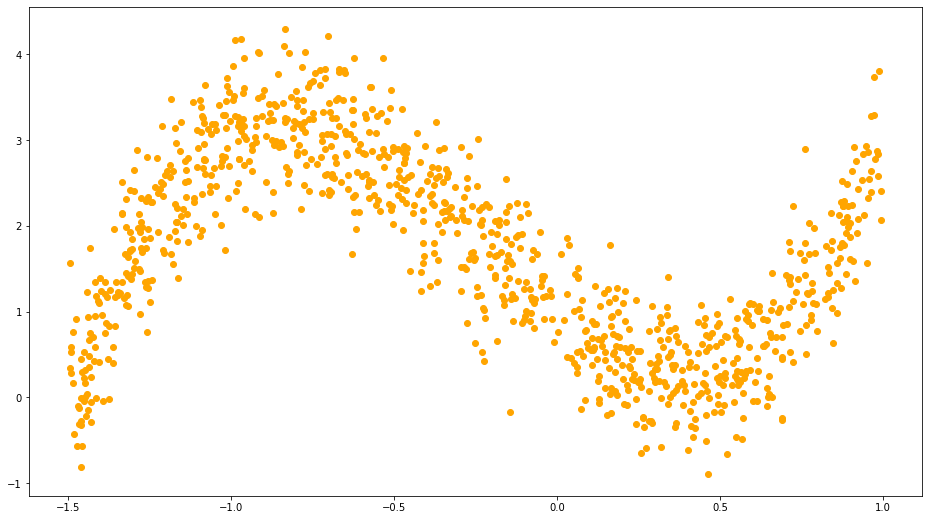

In [ ]:
import random
tmp_x = []
tmp_y = []
xi = -1.5
for i in range(1000):
  xi = random.uniform(-15,1) #get random value in -1.5<xi<1
  tmp_y.append(3*xi*xi*xi+2*xi*xi-3*xi+1+np.random.normal(loc=0.0, scale=math.sqrt(0.25)))
  tmp_x.append(xi)
  
x = np.array(tmp_x)
y = np.array(tmp_y)
plt.figure(figsize=(16,9))
plt.scatter(x,y,c='orange')
plt.show()

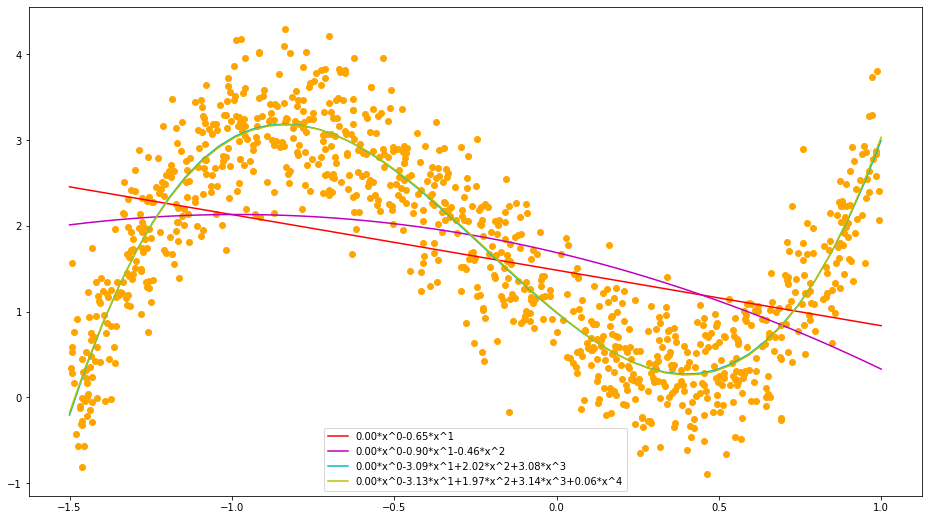

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

color_list=['r','m','c','y']
plt.figure(figsize=(16,9))
plt.scatter(x, y, c='orange')
label = []
for i in range(1,5):
  model_linear = make_pipeline(PolynomialFeatures(i),LinearRegression())
  model_linear.fit(x.reshape(-1,1),y.reshape(-1,1))
  xfit = np.linspace(-1.5, 1.0)
  pre_y = model_linear.predict(xfit[:, np.newaxis])
  coef = model_linear[1].coef_[0]
  for i in range(coef.size):
    tmp = '%.2f*x^%d' % (coef[i],i)
    if(i==0):
      label_tmp = tmp
    else:
      if(coef[i]<0):
        label_tmp = label_tmp + tmp
      else:
        label_tmp = label_tmp + '+' + tmp
  label.append(label_tmp)
  plt.plot(xfit, pre_y, c=color_list[i-1])
plt.legend(label)
plt.show()

# Logistic Regression

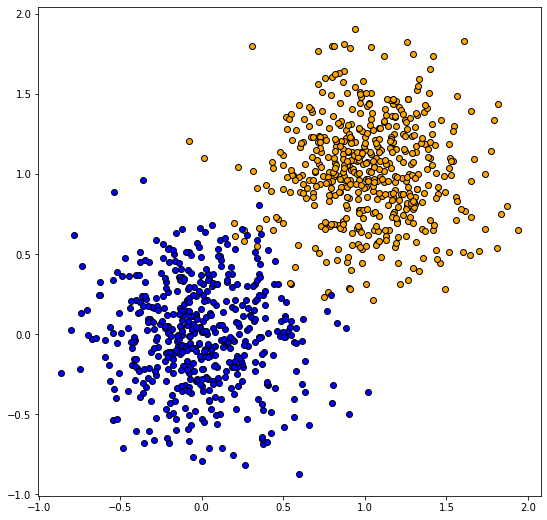

In [ ]:
y_color = ['blue','orange']
plt.figure(figsize=(9,9))
tmp_x = []
tmp_y = []
for i in range(1000):
  yi = np.random.randint(2)
  mean = (yi, yi)
  cov = [[0.1,0],[0,0.1]]
  xi = np.random.multivariate_normal(mean,cov)
  plt.scatter(xi[0],xi[1],c=y_color[yi], edgecolor='k')
  tmp_x.append(xi)
  tmp_y.append(yi)

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logist = LogisticRegression()
x = np.array(tmp_x)
y = np.array(tmp_y)
model_logist.fit(x,y)
print('accuracy: ',model_logist.score(x,y))
coef = model_logist.coef_[0]
intercept = model_logist.intercept_
label_tmp = '%.1f' % intercept
for i in range(coef.size):
  tmp = '%.1f*xi%d' % (coef[i],i)
  if(coef[i]<0):
    label_tmp = label_tmp + tmp
  else:
    label_tmp = label_tmp + '+' + tmp
print('yi = L(',label_tmp,')')

accuracy:  0.989
yi = L( -5.2+5.0*xi0+5.4*xi1 )


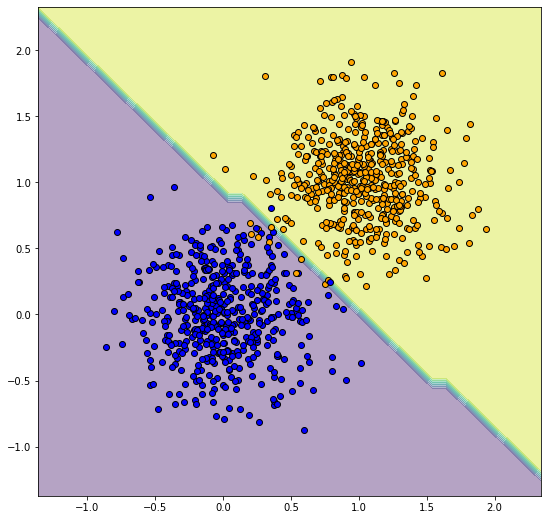

In [ ]:
# Plotting decision regions(bonus)
plt.figure(figsize=(9,9))
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
Z = model_logist.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
for i in range(1000):
  plt.scatter(x[i,0], x[i,1], c = y_color[y[i]], edgecolor='k')
plt.show()